# Parte 1

Escribe una función que tenga como input un vector 'x' con valores distribuidos uniformemente, y unos parámetros:
- a; 
- b; 
- m;  
- n

y que devuelva como output una matriz cuya primera columna sea: 

$y = a + b \cdot x$ 

más un término estocástico sacado de una gaussiana con: 

$\sigma = m + n \cdot x^2$ 

y la segunda columna el error: 

$\sigma = m + n \cdot x^2$ 

In [17]:
get.y <- function(x, intercept, angular.coeff, std.dev.a, std.dev.b){
    y <- c()
    sigma <- c()
    for (value in x){
        my.sigma  <- std.dev.a + std.dev.b * value^2
        sigma <- c(sigma, my.sigma) 
        y <- c(y, rnorm(1, (angular.coeff*value + intercept), sigma))
    }
    my.out.table <- cbind(y, sigma)
    return(as.data.frame(my.out.table))
}

# Parte 2

Escribe otra función que haga lo mismo que la anterior pero con un parámetro más 'c' de tal forma que haga lo mismo pero con un modelo:

$y = a + b \cdot x + c \cdot x^2$

In [18]:
# Esto deberia ser valido para cualquier polinomio.
# parameters es un vector de parametros (e.g. parameters = c(a,b,c))

get.pol.n <- function(x, parameters, std.dev.a, std.dev.b){
    y <- c()
    sigma <- c()
    for (value in x){
        my.sigma  <- std.dev.a + std.dev.b * value^2
        sigma <- c(sigma, my.sigma) 
        model <- 0 
        for (i in 1:length(parameters)){
            model <- model + parameters[i] * value^(i - 1)
            }
            y <- c(y, rnorm(1, model, sigma))        
    }
    my.out.table <- cbind(y, sigma)
    return(as.data.frame(my.out.table))
}

# Parte 3

Usando como valores: 
- a = 1; 
- b = 2;
- c = 0.01;
- m = 0.1;
- n = 0.04 

para el modelo de la primera función: calcula los parámetros para las que el likelihood es máximo asumiendo un modelo con dos parámetros:

$y = a + b \cdot x$ 

Calcula el valor del $\chi^2$ y calcula el nivel de confianza con el que rechazaríamos este ajuste.  

In [33]:
# Defino la likelihood

my.ML <- function(vec.x, mat.y, grade){
    cov.y <- diag(mat.y$sigma)
    ones <- rep(c(1), length(vec.x))
    mat.x <- cbind(ones, vec.x)
    if (grade > 1){
        for (i in 2:grade){
            mat.x <- cbind(mat.x, vec.x^i)
        }
    }
    x.T <- t(mat.x)
    xT.cov.x <- solve(x.T %*% solve(cov.y) %*% mat.x)
    xT.cov.y <- x.T %*% solve(cov.y) %*% mat.y$y
    my.params <- xT.cov.x %*% xT.cov.y
    return(my.params)
}

In [20]:
# Defino los parametros

a <- 1
b <- 2
c <- 0.01
m <- 0.1
n <- 0.04

In [21]:
# Genero los x aleatorios

N <- 100

my.x <- runif(N,0,10)

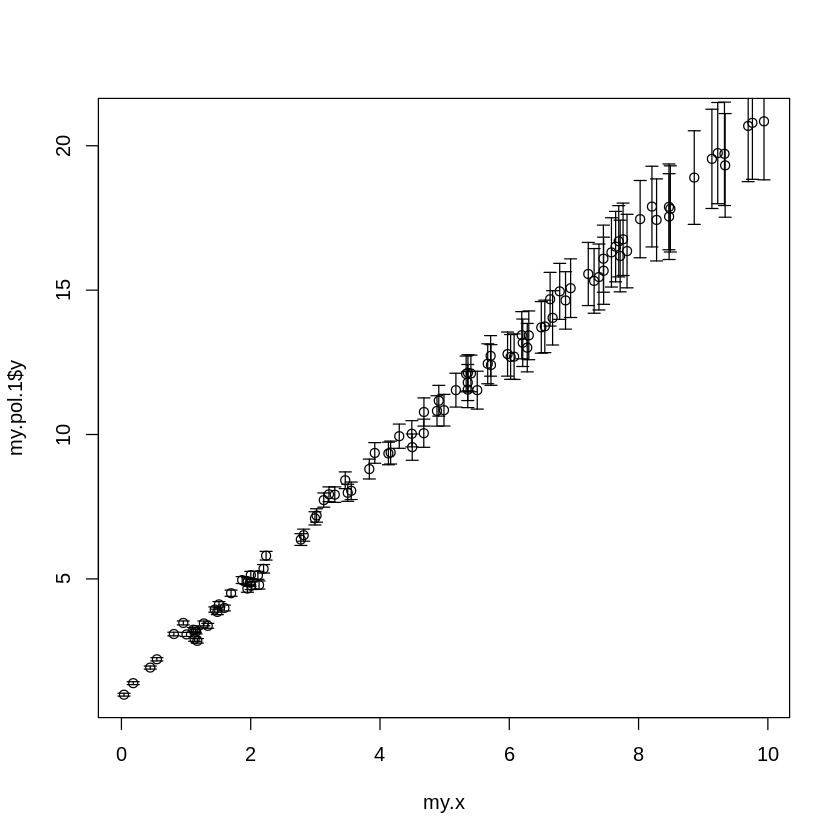

In [22]:
# Genero las 'y' siguiendo el modelo lineal

par.2 <- c(a,b)

my.pol.1 <- get.pol.n(my.x,par.2,m,n)
plot(my.x,my.pol.1$y)
arrows(my.x, my.pol.1$y - my.pol.1$sigma / 2, my.x, my.pol.1$y + my.pol.1$sigma / 2, length = 0.05, angle = 90, code = 3)

ones,"1,000229"
vec.x,"2,004739"


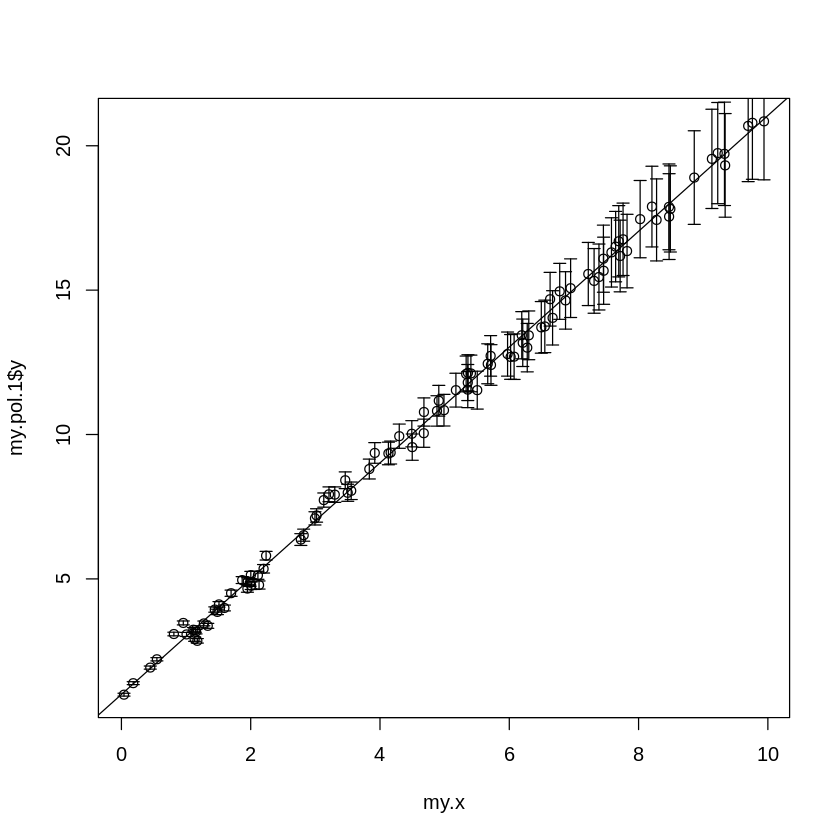

In [34]:
# ajusto al modelo lineal

theta <- my.ML(my.x, my.pol.1, 1)
theta

plot(my.x,my.pol.1$y)
arrows(my.x, my.pol.1$y - my.pol.1$sigma / 2, my.x, my.pol.1$y + my.pol.1$sigma / 2, length = 0.05, angle = 90, code = 3)
abline(theta)

In [24]:
# Defino una función que me calcule el Chi2

my.chi <- function(vec.x, mat.y, vec.parameters){
    cov.y <- diag(mat.y$sigma)
    ones <- rep(c(1), length(vec.x))
    mat.x <- cbind(ones, vec.x)
    x.T <- t(mat.x)
    chi <- ((mat.y$y - mat.x %*% vec.parameters) / mat.y$sigma)^2
    return(sum(chi))
}

In [42]:
# Ahora calculo el Chi2

chi.2.pol1 <- my.chi(my.x, my.pol.1, theta)
chi.2.pol1

my.prob.pol1 <- pchisq(my.chi(my.x, my.pol.1, theta), 98)
my.prob.pol1

print(paste("Obtengo un Chi2 de",chi.2.pol1,"con 98 grados de libertad."))
print(paste("Puedo rechazar este ajuste con una confianza del", my.prob.pol1*100,"%"))

[1] 67,75783

[1] 0,008548324

[1] "Obtengo un Chi2 de 67,7578282452403 con 98 grados de libertad."
[1] "Puedo rechazar este ajuste con una confianza del 0,854832352444311 %"


# Parte 4

Repite el paso anterior con el mismo modelo pero usando la segunda función.

ones,"0,9963628282"
vec.x,"2,0084909661"
,"-0,0004988278"


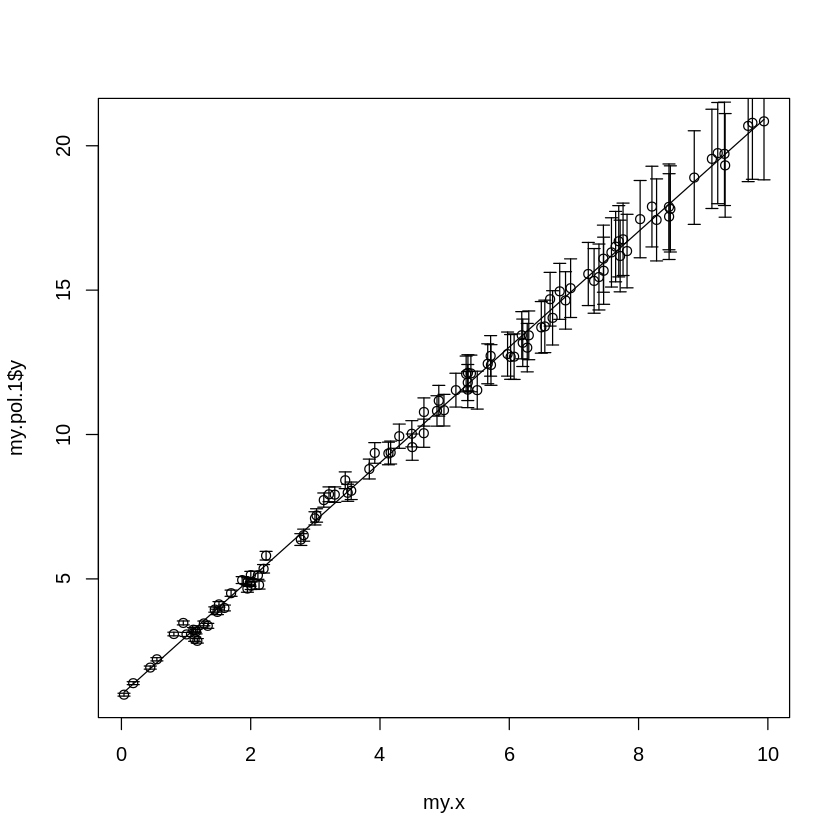

In [40]:
# ajusto al modelo cuadratico

theta.2 <- my.ML(my.x, my.pol.1, 2)
theta.2

plot(my.x,my.pol.1$y)
arrows(my.x, my.pol.1$y - my.pol.1$sigma / 2, my.x, my.pol.1$y + my.pol.1$sigma / 2, length = 0.05, angle = 90, code = 3)
curve(theta.2[1] + theta.2[2]*x + theta.2[3]*x^2, add = T)

In [49]:
# Ahora calculo el Chi2

chi.2.pol2 <- my.chi(my.x, my.pol.1, theta)
chi.2.pol2

my.prob.pol2 <- pchisq(my.chi(my.x, my.pol.1, theta), 98)
my.prob.pol2

print(paste("Obtengo un Chi2 de",chi.2.pol2,"con 97 grados de libertad."))
print(paste("Puedo rechazar este ajuste con una confianza del", my.prob.pol2*100,"%"))

[1] 67,75783

[1] 0,008548324

[1] "Obtengo un Chi2 de 67,7578282452403 con 97 grados de libertad."
[1] "Puedo rechazar este ajuste con una confianza del 0,854832352444311 %"


# Parte 5

Usando la primera de las funciones anteriores con los valores dados en 3) calcula el valor del likelihood ratio 'q' para un modelo con 2 y 3 parámetros. 

¿Con qué confidence level podemos aceptar H$_0$? 

Comenta el resultado: ¿qué modelo es mejor el primero o el segundo?.

In [50]:
q <- -2 * (log(chi.2.pol1) - log(chi.2.pol2))
q

my.prob.H0 <- pchisq(q, 1)

print(paste("Obtengo un maximum likelihood ratio de", q,"con 1 grado de libertad"))
print(paste("Puedo aceptar la hipotesis 0 (el ajuste correcto es con 2 parametros) con una confianza del",(1 - my.prob.H0)*100,"%"))

[1] 0

[1] "Obtengo un maximum likelihood ratio de 0 con 1 grado de libertad"
[1] "Puedo aceptar la hipotesis 0 (el ajuste correcto es con 2 parametros) con una confianza del 100 %"
